In [25]:
import z3
z3.set_param("parallel.enable", "true")


In [26]:
n = 100

x = n*[None]
y = n*[None]

for i in range(n):
    x[i] = z3.Int(f'x[{i}]')
    y[i] = z3.Int(f'y[{i}]')

s = z3.Solver()
for i in range(1,n):
    s.add(z3.Or(
                z3.And(z3.Or(x[i] == x[i-1]+1, x[i] == x[i-1]-1, x[i] == x[i-1]), y[i] == y[i-1]),
                z3.And(z3.Or(y[i] == y[i-1]+1, y[i] == y[i-1]-1), x[i] == x[i-1])
                )
            )
                    
                        

    
s.add(x[0] == 5)
s.add(x[n-1] == 30)
s.add(y[0] == 1)
s.add(y[n-1] == 39)
s.check()
m = s.model()

In [27]:
xp, yp = n*[0], n*[0]
for i in range(n):
    xp[i], yp[i] = (m[x[i]].as_long(), m[y[i]].as_long())
    print(f'{xp[i]}   {yp[i]}')

5   1
6   1
7   1
8   1
9   1
9   2
9   3
10   3
11   3
12   3
12   4
13   4
14   4
14   5
14   6
15   6
15   7
16   7
17   7
17   8
18   8
19   8
19   9
20   9
20   10
20   11
20   12
20   12
21   12
21   13
20   13
20   13
21   13
22   13
22   14
22   15
22   16
22   17
23   17
24   17
23   17
24   17
23   17
24   17
24   18
24   19
25   19
26   19
27   19
27   20
28   20
27   20
28   20
28   21
29   21
28   21
28   22
29   22
30   22
30   23
30   24
31   24
30   24
30   25
29   25
30   25
30   26
31   26
32   26
32   27
32   28
32   29
32   30
31   30
31   31
31   32
30   32
30   33
31   33
30   33
29   33
30   33
31   33
30   33
31   33
31   34
31   35
30   35
29   35
30   35
29   35
29   36
30   36
31   36
32   36
32   37
32   38
31   38
30   38
30   39


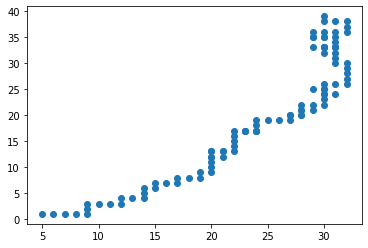

In [28]:
import matplotlib.pyplot as plt


plt.scatter(xp,yp)
plt.show()


no solution


In [42]:
n = 20

xa = n*[None]
ya = n*[None]

for i in range(n):
    xa[i] = z3.Int(f'xa[{i}]')
    ya[i] = z3.Int(f'ya[{i}]')

s = z3.Solver()
for i in range(1,n):
    s.add(z3.Or(
                z3.And(z3.Or(xa[i] == xa[i-1]+1, xa[i] == xa[i-1]-1, xa[i] == xa[i-1]), ya[i] == ya[i-1]),
                z3.And(z3.Or(ya[i] == ya[i-1]+1, ya[i] == ya[i-1]-1), xa[i] == xa[i-1])
                )
            )
                    
xb = n*[None]
yb = n*[None]

for i in range(n):
    xb[i] = z3.Int(f'xb[{i}]')
    yb[i] = z3.Int(f'yb[{i}]')

for i in range(1,n):
    s.add(z3.Or(
                z3.And(z3.Or(xb[i] == xb[i-1]+1, xb[i] == xb[i-1]-1, xb[i] == xb[i-1]), yb[i] == yb[i-1]),
                z3.And(z3.Or(yb[i] == yb[i-1]+1, yb[i] == yb[i-1]-1), xb[i] == xb[i-1])
                )
            )                 

for a in range(n):
    for b in range(n):
        s.add(z3.Not(z3.And(xa[a]==xb[b],ya[a]==yb[b])))
        
    
s.add(xa[0] == 5)
s.add(xa[n-1] == 8)
s.add(ya[0] == 3)
s.add(ya[n-1] == 6)
s.add(xb[0] == 4)
s.add(xb[n-1] == 7)
s.add(yb[0] == 6)
s.add(yb[n-1] == 2)

print(s.check())
m = s.model()

sat


In [43]:
xap, yap = n*[0], n*[0]
for i in range(n):
    xap[i], yap[i] = (m[xa[i]].as_long(), m[ya[i]].as_long())

xbp, ybp = n*[0], n*[0]
for i in range(n):
    xbp[i], ybp[i] = (m[xb[i]].as_long(), m[yb[i]].as_long())


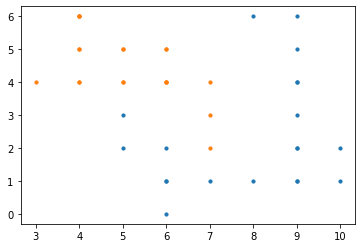

In [44]:
import matplotlib.pyplot as plt



fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(xap, yap, s=10 )
ax1.scatter(xbp, ybp, s=10 )
plt.show()
